--- Data Head ---
  name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  literates_female  \
0                 8587                   7283  ...             44972   
1       

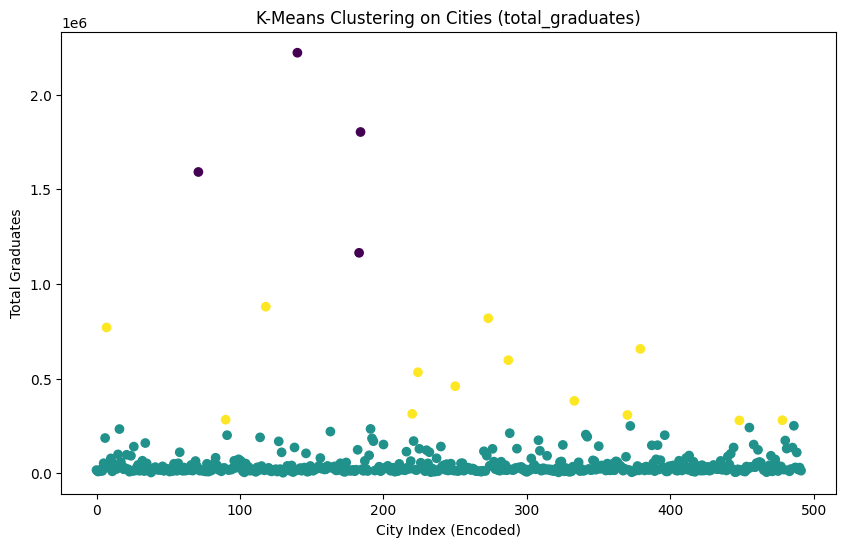

In [2]:
# --- Import Libraries ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# --- (a) Load Dataset ---
df = pd.read_csv("Cities_r2.csv")
print("--- Data Head ---")
print(df.head())

# --- (b) Data Preprocessing ---
# Encode city names (name_of_city) if required
if df['name_of_city'].dtype == 'object':
    le = LabelEncoder()
    df['name_of_city'] = le.fit_transform(df['name_of_city'])

# Select relevant numeric feature(s)
# Here we are clustering based on 'total_graduates'
if 'total_graduates' not in df.columns:
    # If total_graduates not directly present, create it
    df['total_graduates'] = df['male_graduates'] + df['female_graduates']

X = df[['total_graduates']]

# --- (c) Apply K-Means Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# --- (d) Display Results ---
print("\n--- Cluster Centers ---")
print(kmeans.cluster_centers_)
print("\n--- Clustered Data ---")
print(df[['name_of_city', 'total_graduates', 'Cluster']].head())

# --- (e) Visualization ---
plt.figure(figsize=(10,6))
plt.scatter(df['name_of_city'], df['total_graduates'], c=df['Cluster'], cmap='viridis')
plt.title("K-Means Clustering on Cities (total_graduates)")
plt.xlabel("City Index (Encoded)")
plt.ylabel("Total Graduates")
plt.show()
